In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from scipy.stats.contingency import chi2_contingency
import xgboost as xgb
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tfit
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
import catboost
from catboost import CatBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
data=pd.read_csv('train.csv')

In [3]:
df=pd.read_csv('train.csv')

Dataset Description

ID: The unique identifier for each record in the dataset.
Customer_ID: The unique identifier for each customer.
Month: The month to which the record corresponds.
Name: The name of the customer.
Age: The age of the customer. Note: There are some data quality issues, such as anomalous values.
SSN: The Social Security Number of the customer.
Occupation: The occupation of the customer.
Annual_Income: The annual income of the customer in USD.
Monthly_Inhand_Salary: The monthly take-home (net) salary of the customer in USD.
Num_Bank_Accounts: The number of bank accounts held by the customer.
Num_Credit_Card: The number of credit cards held by the customer.
Interest_Rate: The average interest rate (%) applicable to the customer's loans or credit cards.
Num_of_Loan: The number of loans (including mortgages, personal loans, auto loans, etc.) that the customer has.
Type_of_Loan: The types of loans taken by the customer, listed in a single cell and separated by semicolons.
Delay_from_due_date: The average delay (in days) from the due date for payments across all the customer's loans and credit cards.
Num_of_Delayed_Payment: The total number of times the customer has delayed payments across all loans and credit cards.
Changed_Credit_Limit: Any recent changes to the customer's credit limit (requires further context).
Num_Credit_Inquiries: The number of inquiries made on the customer's credit report, typically indicating applications for new credit.
Credit_Mix: The diversity of credit types held by the customer, affecting credit scores. Specific categories (e.g., "Good", "Bad") need further definition.
Outstanding_Debt: The total outstanding debt the customer has across all loans and credit lines.
Credit_Utilization_Ratio: The ratio of total debt to total available credit, a key indicator of credit risk.
Credit_History_Age: The age of the customer's credit history.
Payment_of_Min_Amount: Indicates whether the customer typically pays at least the minimum amount due on their debts.
Total_EMI_per_month: The total monthly payment the customer makes towards all their loans as EMI (Equated Monthly Installment).
Amount_invested_monthly: The amount of money the customer invests monthly (could be in savings accounts, stocks, bonds, etc.).
Payment_Behaviour: Characterizes the customer's payment behavior in terms of expenditure and value of transactions.
Monthly_Balance: The average monthly balance maintained by the customer in their accounts.
Credit_Score: The credit score of the customer, a summary measure of their creditworthiness.

In [4]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
data.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [11]:
data['Age'] = data['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data['Num_of_Loan'] = data['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

In [12]:
data['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [13]:
data['Annual_Income'] = data['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
data['Annual_Income'] = data['Annual_Income'].astype(float)

In [14]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_', np.nan)
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(0)

In [15]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(str)
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'], errors='coerce')
data['Outstanding_Debt'] = data['Outstanding_Debt'].fillna(0)


In [16]:
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(str)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace('', '0')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(0)

In [17]:
data['Monthly_Balance'] = data['Monthly_Balance'].astype(str)
data['Monthly_Balance'] = data['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(0)

In [18]:
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  

data['Credit_History_Age_Months'] = data['Credit_History_Age'].apply(parse_years_and_months)

In [19]:
def years_months_to_months(period):
    if pd.isnull(period):
        return period
    
    parts = period.split(' ')
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

data['Credit_History_Age_Months'] = data['Credit_History_Age'].apply(years_months_to_months)
data[['Credit_History_Age', 'Credit_History_Age_Months']].head()

data.drop(columns=['Credit_History_Age'], inplace=True)

In [20]:
data = data[data['Payment_Behaviour'] != '!@9#%8']
data = data[data['Occupation'] != '_______']
data = data[data['Credit_Mix'] != '_']

In [21]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    data = data[data[column] >= 0]

In [22]:
columns_to_drop = ['ID',  'Name', 'SSN','Customer_ID']

data.drop(columns=columns_to_drop, inplace=True)

In [23]:
data.isnull().sum()

Month                            0
Age                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary        10019
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                  7381
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries          1320
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Credit_History_Age_Months     6036
dtype: int64

In [24]:
data['Credit_History_Age_Months'].unique()

array([267., 268., 269., 271.,  nan, 320., 322., 323., 324., 325., 326.,
       214., 218., 219., 220., 207., 208., 209., 213., 369., 370., 373.,
       374., 375., 386., 367., 371., 372., 177., 181., 256., 257., 258.,
       260., 262., 263., 230., 231., 233., 234., 235., 306., 307., 308.,
       309., 310., 328., 329., 108., 109., 110., 111., 112., 114., 221.,
       224., 225., 202., 203., 204., 206., 351., 354., 357.,  77.,  78.,
        79.,  80.,  82.,  83.,  84., 331., 333., 237., 121., 122., 123.,
       128., 395., 397., 148., 149., 151., 152., 154., 147., 150., 217.,
       164., 167., 232., 236., 368., 106., 107., 222., 226., 227., 228.,
       229., 105., 158., 161., 162., 163., 264., 312., 314., 159., 165.,
       335., 336., 340., 341.,  94.,  95., 101., 291., 292., 293., 294.,
       296., 297., 205., 211., 212.,  14.,  15.,  17.,  19., 131., 132.,
       135., 136., 137., 138., 238., 240., 241., 126., 127., 129., 168.,
       171., 172., 173., 248., 250., 251., 252., 25

In [25]:
data['Type_of_Loan'].fillna('Other',inplace=True)

In [26]:
data['Monthly_Inhand_Salary'].fillna(data['Monthly_Inhand_Salary'].median(), inplace=True)

In [27]:
data['Num_Credit_Inquiries'] = data['Num_Credit_Inquiries'].apply(lambda x: x if 0 <= x <= 50 else np.nan)

median_inquiries = data['Num_Credit_Inquiries'].median()
data['Num_Credit_Inquiries'].fillna(median_inquiries, inplace=True)

In [28]:
median_credit_history_age = data['Credit_History_Age_Months'].median()
data['Credit_History_Age_Months'].fillna(median_credit_history_age, inplace=True)

In [29]:
data.isnull().sum()

Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Type_of_Loan                 0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [30]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
2,March,500,Scientist,19114.12,3089.149167,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,April,23,Scientist,19114.12,3089.149167,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271.0
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,July,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.70,25.123535,Yes,60.964772,173.275503,Low_spent_Large_value_payments,228.750392,Standard,218.0
99991,August,29,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,Bad,3571.70,37.140784,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard,75.0
99993,February,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,29.135447,No,58638.000000,180.733095,Low_spent_Medium_value_payments,400.104466,Standard,376.0
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,380.0


In [31]:
credit_score_mapping = {'Good': 2, 'Standard': 1, 'Poor': 0}
data['Credit_Score_Encoded'] = data['Credit_Score'].map(credit_score_mapping)

In [32]:
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM', np.nan)

most_common_value = data['Payment_of_Min_Amount'].mode()[0]
data['Payment_of_Min_Amount'].fillna(most_common_value, inplace=True)

## Убираем выбросы

In [33]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    df_cleaned = df.copy()
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.1) 
        Q3 = df[col].quantile(0.9)  
        IQR = Q3 - Q1  
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned

data = remove_outliers_iqr(data)

In [34]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_Score_Encoded
3,April,23,Scientist,19114.12,3089.149167,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0,2
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0,2
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271.0,2
7,August,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,218.0,1
9,February,28,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,...,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,January,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,3571.70,22.895966,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,Poor,68.0,0
99986,March,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,3571.70,24.713861,Yes,60.964772,76.282793,Low_spent_Small_value_payments,345.743101,Poor,70.0,0
99990,July,28,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,3571.70,25.123535,Yes,60.964772,173.275503,Low_spent_Large_value_payments,228.750392,Standard,218.0,1
99991,August,29,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",...,3571.70,37.140784,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard,75.0,1


## EDA

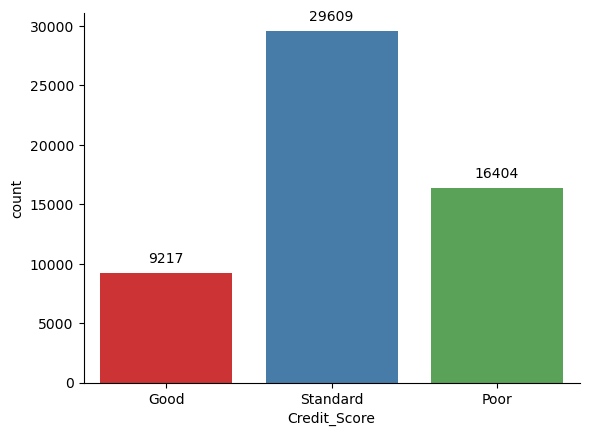

In [35]:
ax = sns.countplot(x=data["Credit_Score"], palette='Set1')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

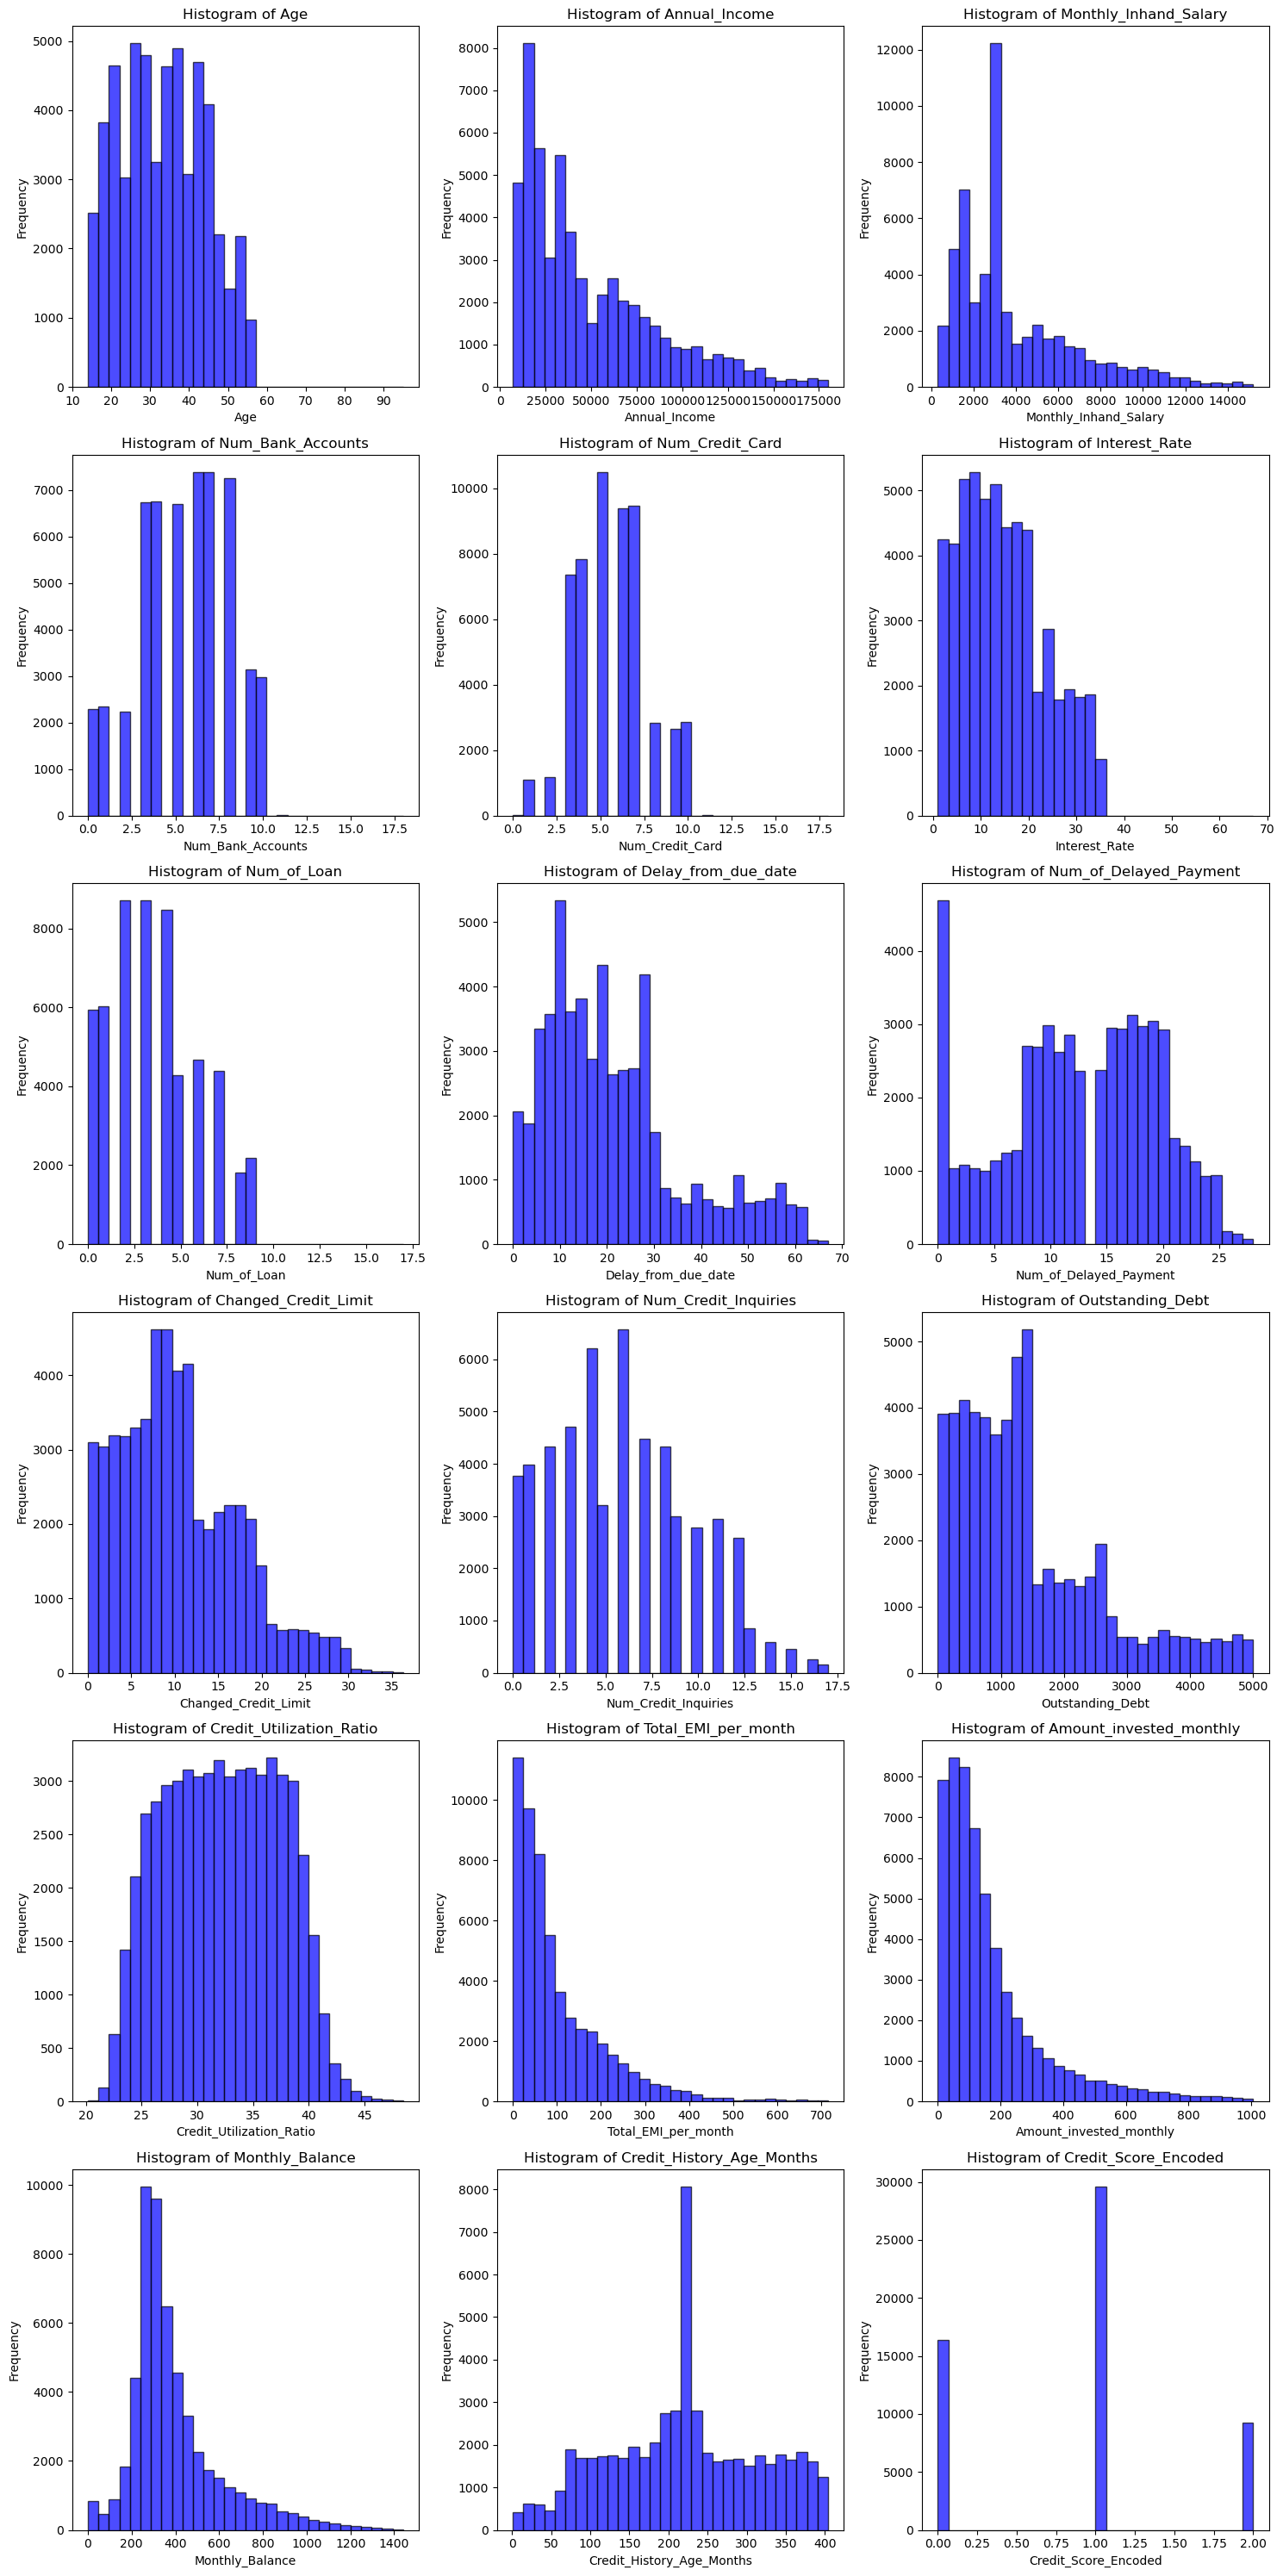

In [36]:
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten() 
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        df[col].plot(kind='hist', bins=30, ax=ax, alpha=0.7, color='blue', edgecolor='black')
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
plot_histograms(data)

In [37]:
data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months',
       'Credit_Score_Encoded'],
      dtype='object')

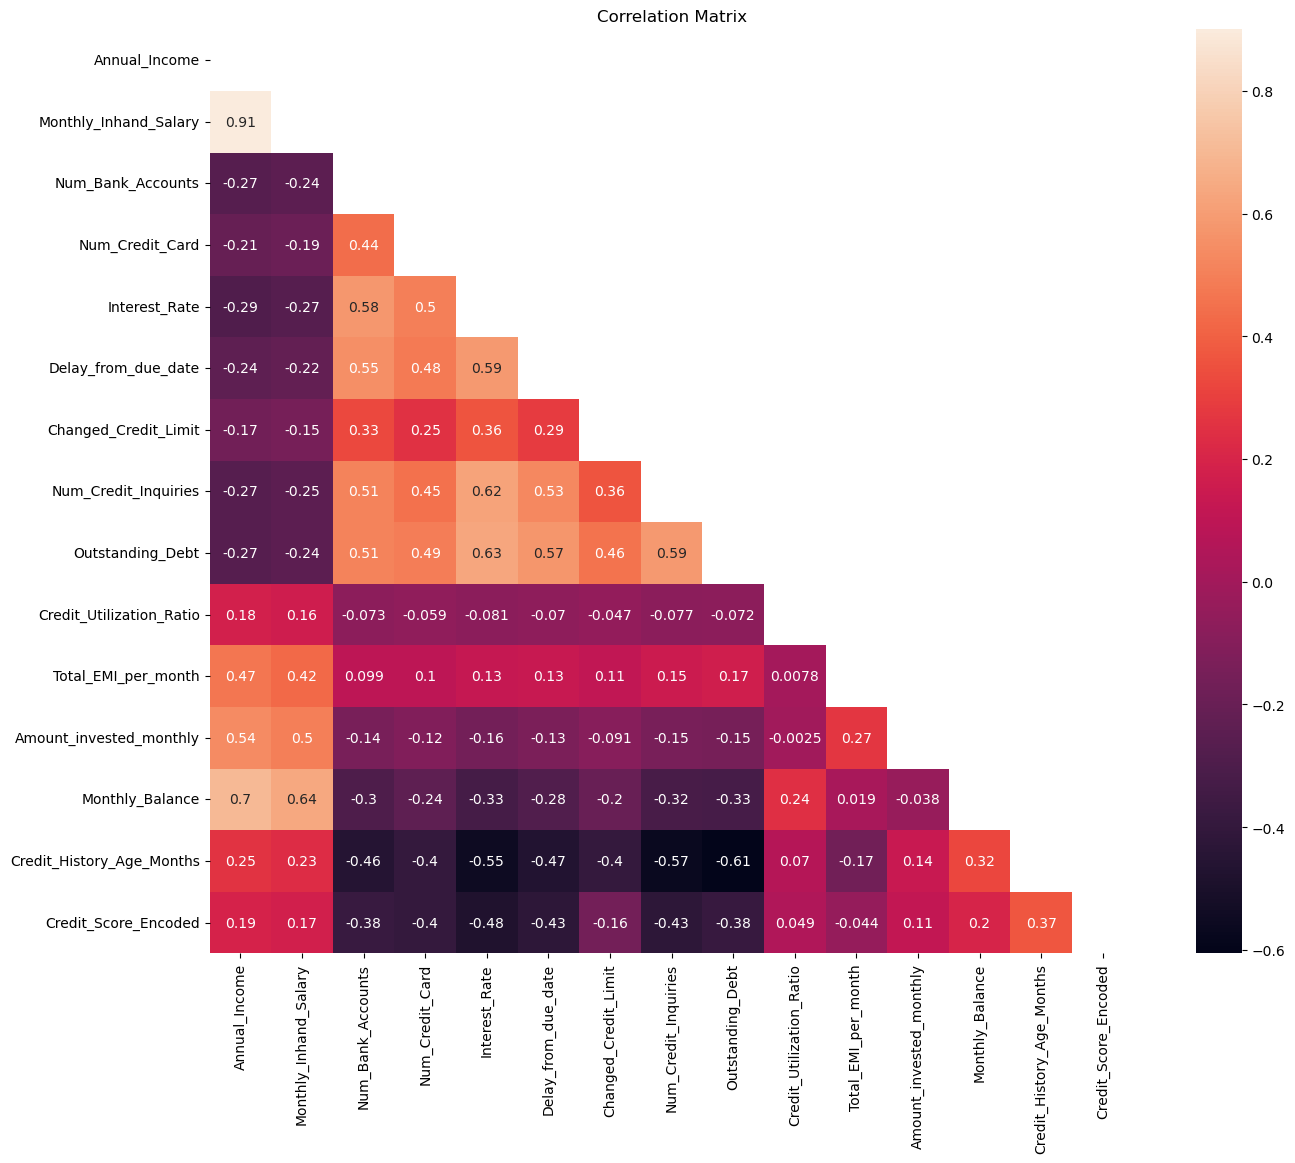

In [38]:
corr = data.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [39]:
data["Credit_Score"].factorize(sort=False)


(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['Good', 'Standard', 'Poor'], dtype='object'))

## Тесты на значимость признаков

In [40]:
def chi_2_test(df:pd.DataFrame):
    df_copy = df.copy()
    cat_cols = df_copy.select_dtypes(exclude="number").columns.drop( ["Credit_Score"])
    numb_columns = df_copy.select_dtypes(include="number").columns.drop(['Credit_Score_Encoded'])

    summary = np.empty((len(cat_cols)+len(numb_columns), 3), dtype="object")
    y, *_ = df_copy["Credit_Score"].factorize(sort=False)

    def perform_test(*args, test):

        if test == "chi2":
            for i, col in enumerate(args[0]):
                cross = pd.crosstab(index=df[col], columns=[df["Credit_Score"]])
                t_stat, pvalue, *_ = chi2_contingency(cross)
                summary[i, :] = [col, t_stat, pvalue]

        elif test=="f_classif":
            for i, col in enumerate(args[0], start=len(summary)-len(args[0])):
                t_stat, pvalue = f_classif(df_copy[[col]], y.reshape(-1, 1))
                summary[i, :] = [col, t_stat[0], pvalue[0]]

    perform_test(cat_cols, test="chi2")
    perform_test(numb_columns, test="f_classif")

    return pd.DataFrame(
        data=summary,
        columns=["column", 't-statistic', "p-value"]
    )

                       column   t-statistic p-value
2                Type_of_Loan  39892.208026     0.0
3                  Credit_Mix  22134.061132     0.0
4       Payment_of_Min_Amount    9858.41434     0.0
11              Interest_Rate   8233.919696     0.0
16       Num_Credit_Inquiries   6242.414019     0.0
13        Delay_from_due_date   6155.406095     0.0
10            Num_Credit_Card   5228.293887     0.0
9           Num_Bank_Accounts   4950.951162     0.0
17           Outstanding_Debt   4900.202318     0.0
22  Credit_History_Age_Months   4312.711186     0.0
12                Num_of_Loan    3906.61792     0.0
14     Num_of_Delayed_Payment   3124.424805     0.0
15       Changed_Credit_Limit   1346.682826     0.0
21            Monthly_Balance   1147.019407     0.0
7               Annual_Income     1028.3976     0.0
5           Payment_Behaviour    914.950926     0.0
8       Monthly_Inhand_Salary    834.966131     0.0
6                         Age    713.988586     0.0
20    Amount

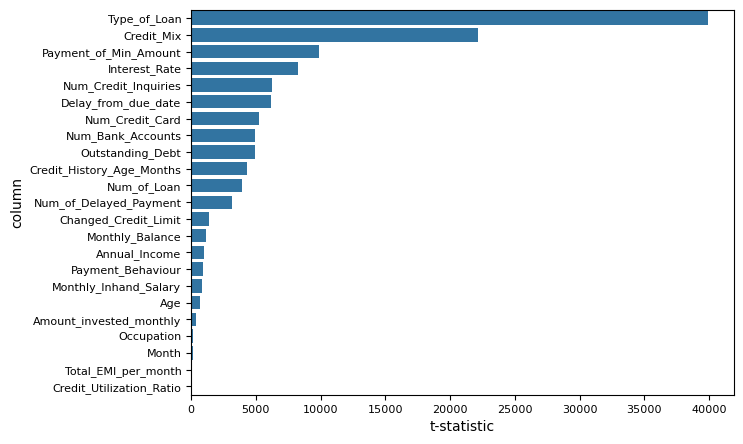

In [41]:
chi2_summary = chi_2_test(data).sort_values(by="t-statistic", ascending=False)
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=chi2_summary, y="column", x="t-statistic", ax=ax)
plt.setp([ax.get_xticklabels(), ax.get_yticklabels()], size=8)
print(chi2_summary)
fig.show()

Признак с высокой статистикой указывает на то, что различия в значениях этого признака между классами очень выражены, и он, скорее всего, будет полезен для классификации.

## Модели

In [42]:
data.drop(['Credit_Score'],inplace=True,axis=1)

In [43]:
X = data.drop('Credit_Score_Encoded', axis=1)
y = data['Credit_Score_Encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.20)

In [217]:
list(data.select_dtypes(include="number").columns)

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_History_Age_Months',
 'Credit_Score_Encoded']

In [44]:
cat1 = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
cat2 = ['Month', 'Occupation', 'Type_of_Loan']

num =  list(X.select_dtypes(include="number").columns)

cat1_transformer = OneHotEncoder(handle_unknown='ignore')  
cat2_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  
num_transformer = StandardScaler() 
preprocessor = ColumnTransformer(
    transformers=[
        ('cat1', cat1_transformer, cat1),  
        ('high_card_cat', cat2_transformer, cat2),  
        ('num', num_transformer, num)
    ]
)

In [219]:
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  
])
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  
    'classifier__penalty': ['l1', 'l2'],  
    'classifier__solver': ['liblinear', 'saga']  
}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Лучший результат: 0.661483751826821


In [224]:
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,C=100,penalty='l1',solver='liblinear'))  
])
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy_score(y_test,y_pred)

0.6590621039290241

In [226]:
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())  
])
param_grid = {
    'classifier__n_estimators': [50, 100, 200],      
    'classifier__max_depth': [None, 10, 20, 30],   
    'classifier__min_samples_split': [2, 5, 10],    
    'classifier__min_samples_leaf': [1, 2, 4],      
    'classifier__criterion': ['gini', 'entropy'],   
    'classifier__class_weight': [None, 'balanced']  
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Лучшие параметры: {'classifier__class_weight': None, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [260]:
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=500,class_weight=None,criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2))  
])
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7906029331884845

In [231]:
catboost = CatBoostClassifier(cat_features=['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour','Month', 'Occupation', 'Type_of_Loan'], random_state=42, verbose=0)

param_grid = {
    'iterations': [100, 200],  
    'depth': [6, 8, 10],      
    'learning_rate': [0.01, 0.1, 0.2], 
    'l2_leaf_reg': [1, 3, 5],  
    'border_count': [32, 64], 
}

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, 
                           scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Лучшие параметры: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'border_count': 32, 'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.01}


In [232]:
catboost = CatBoostClassifier(border_count=32,depth=6,iterations=100,l2_leaf_reg=1,learning_rate=0.01,cat_features=['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour','Month', 'Occupation', 'Type_of_Loan'], random_state=42, verbose=0)
catboost.fit(X_train, y_train)
y_pred=catboost.predict(X_test)
accuracy_score(y_test,y_pred)

0.6930110447220713

In [52]:
smote_params = {
    'sampling_strategy': 'auto',
    'random_state': 77,
    'k_neighbors': 5,
    'n_jobs': -1
}
smote = SMOTE(**smote_params)

X_preprocessed = preprocessor.fit_transform(X)

X_smote, y_smote = smote.fit_resample(X_preprocessed, y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.15, random_state=77)

rf_classifier = RandomForestClassifier(
    n_estimators=500,
    class_weight=None,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=7,
)

rf_classifier.fit(X_train_smote, y_train_smote)

print("Accuracy on training set:", rf_classifier.score(X_train_smote, y_train_smote))

y_pred_smote = rf_classifier.predict(X_test_smote)
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)

print("Accuracy on SMOTE test set:", accuracy_smote)

Accuracy on training set: 0.9220550448994729
Accuracy on SMOTE test set: 0.826266416510319


In [113]:
def get_feature_names(preprocessor, input_features):
    feature_names = []
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'get_feature_names_out'):
            # Например, OneHotEncoder
            feature_names.extend(transformer.get_feature_names_out(columns))
        else:
            # Например, OrdinalEncoder или StandardScaler
            feature_names.extend(columns)
    return feature_names

feature_names = get_feature_names(preprocessor, X.columns)

In [121]:
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

In [91]:
xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7,  1.0]
}


grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5,  
                           verbose=1, 
                           n_jobs=-1) 

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.7}


In [100]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,colsample_bytree=1,learning_rate=0.2,max_depth=10,subsample=0.7)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred=xgb_model.predict(X_test_smote)
accuracy_score(y_test_smote,y_pred)

0.8610881801125704

In [101]:
logreg = LogisticRegression(max_iter=1000,C=100,penalty='l1',solver='liblinear')
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3,colsample_bytree=1,learning_rate=0.2,max_depth=10,subsample=0.7)
cat = CatBoostClassifier(border_count=32,depth=6,iterations=100,l2_leaf_reg=1,learning_rate=0.01, random_state=42, verbose=0)
meta_model = RandomForestClassifier(
    n_estimators=500,
    class_weight=None,
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=5,
    min_samples_split=7,
)

stacking_model = StackingClassifier(
    estimators=[('logreg', logreg), ('xgb', xgb_model), ('catboost', cat)],
    final_estimator=meta_model,
    cv=5  
)
stacking_model.fit(X_train_smote,y_train_smote)
y_pred=stacking_model.predict(X_test_smote)
accuracy_score(y_test_smote,y_pred)

0.8657410881801125

## RFE

In [122]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    
    selected_features = rfe.support_  
    selected_columns = X_train.columns[selected_features]  
    
    return X_train[selected_columns], X_test[selected_columns], y_train, y_test

def train_and_evaluate_with_RFE(X, y, k):
    model = RandomForestClassifier(n_jobs=-1, random_state=42)
    
    X_train_selected, X_test_selected, y_train, y_test = RFE_feature_selection(X, y, model, k)
    
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {k} selected features: {accuracy}")

for k in range(5, X.shape[1] + 1, 5):  
    train_and_evaluate_with_RFE(X_preprocessed_df, y, k)

Accuracy with 5 selected features: 0.7405395618323375
Accuracy with 10 selected features: 0.7780191924678617
Accuracy with 15 selected features: 0.7845373891001267
Accuracy with 20 selected features: 0.7903313416621401


In [123]:
X_smote2, y_smote2 = smote.fit_resample(X_preprocessed_df, y)

,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-1.105457,-1.234860,-0.619021,-0.492997,-0.547538,-0.175844,-0.496527,0.182398,-0.814794,0.515153
1,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,...,-1.038175,-1.814591,0.116906,-0.492997,-0.547538,-1.465435,-0.496527,-0.737295,-0.259670,0.525669
2,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,-1.240019,-0.655130,0.116906,-0.492997,-0.547538,-1.908281,-0.496527,0.059526,-0.715496,0.546701
3,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,...,-1.240019,-0.944995,0.116906,-0.492997,-0.547538,-1.634666,-0.496527,-0.834101,-0.181437,-0.010648
4,0.0,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000,...,-0.970894,-1.669658,-0.449757,-1.020227,-0.723036,1.229855,-0.791954,-0.743283,0.413329,1.061985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88822,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.240316,0.0,0.000000,0.759684,...,-0.852500,0.614433,-0.315586,0.297847,-0.679373,0.913166,-0.403484,-0.181619,0.143145,0.963991
88823,0.0,1.000000,0.000000,0.407003,0.592997,0.0,0.592997,0.0,0.000000,0.000000,...,-0.579721,-1.170798,-0.906122,-0.394936,-0.282851,-1.104374,-0.184258,0.498709,-0.099034,-0.035706
88824,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.690050,...,-0.799344,-1.065340,-1.114930,-1.302335,-0.984734,0.771320,-0.972678,1.908832,-0.496388,0.074406
88825,0.0,0.292424,0.707576,0.292424,0.707576,0.0,0.292424,0.0,0.000000,0.000000,...,-0.332334,0.539905,-0.197912,0.111320,-0.449990,-1.186671,1.474439,1.808537,-0.695890,0.188216


In [124]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    rfe = RFE(estimator=model, n_features_to_select=k)
    rfe.fit(X_train, y_train)
    
    selected_features = rfe.support_  
    selected_columns = X_train.columns[selected_features]  
    
    return X_train[selected_columns], X_test[selected_columns], y_train, y_test

def train_and_evaluate_with_RFE(X, y, k):
    model = RandomForestClassifier(n_jobs=-1, random_state=42)
    
    X_train_selected, X_test_selected, y_train, y_test = RFE_feature_selection(X, y, model, k)
    
    model.fit(X_train_selected, y_train)
    
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {k} selected features: {accuracy}")

for k in range(5, X.shape[1] + 1, 5):  
    train_and_evaluate_with_RFE(X_smote2, y_smote2, k)

Accuracy with 5 selected features: 0.8404818192052235
Accuracy with 10 selected features: 0.850388382303276
Accuracy with 15 selected features: 0.8554542384329619
Accuracy with 20 selected features: 0.8606326691433075


## ANN

In [80]:
model = Sequential([
    Dense(512, input_dim=X_train_smote.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'), 
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)

model.fit(x=X_train_smote,
          y=y_train_smote,
          validation_data=(X_test_smote, y_test_smote),
          validation_split=0.2,
          batch_size=512,
          epochs=500,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.3530 - loss: 1.1958 - val_accuracy: 0.3449 - val_loss: 1.1020
Epoch 2/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4006 - loss: 1.0716 - val_accuracy: 0.3339 - val_loss: 2.7607
Epoch 3/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6185 - loss: 0.8645 - val_accuracy: 0.3423 - val_loss: 1.4237
Epoch 4/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6572 - loss: 0.8185 - val_accuracy: 0.6208 - val_loss: 0.8807
Epoch 5/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6587 - loss: 0.8168 - val_accuracy: 0.6719 - val_loss: 0.7986
Epoch 6/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6761 - loss: 0.7955 - val_accuracy: 0.6811 - val_loss: 0.7852
Epoch 7/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6936 - loss: 0.7736 - val_accuracy: 0.6004 - val_loss: 0.9416
Epoch 8/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7064 - loss: 0.7575 -

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7249 - loss: 0.7039 - val_accuracy: 0.7304 - val_loss: 0.7198
Epoch 51/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7267 - loss: 0.6998 - val_accuracy: 0.7331 - val_loss: 0.6910
Epoch 52/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7274 - loss: 0.6969 - val_accuracy: 0.6314 - val_loss: 0.8102
Epoch 53/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7232 - loss: 0.7050 - val_accuracy: 0.5809 - val_loss: 0.8947
Epoch 54/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7276 - loss: 0.6992 - val_accuracy: 0.7405 - val_loss: 0.6964
Epoch 55/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7270 - loss: 0.7014 - val_accuracy: 0.7116 - val_loss: 0.7442
Epoch 56/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7260 - loss: 0.6987 - val_accuracy: 0.7215 - val_loss: 0.7379
Epoch 57/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7220 - loss: 0.7064 - val_a

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7342 - loss: 0.6838 - val_accuracy: 0.6600 - val_loss: 0.8506
Epoch 100/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7324 - loss: 0.6874 - val_accuracy: 0.7436 - val_loss: 0.6670
Epoch 101/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7353 - loss: 0.6811 - val_accuracy: 0.7424 - val_loss: 0.6935
Epoch 102/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7376 - loss: 0.6773 - val_accuracy: 0.7406 - val_loss: 0.6782
Epoch 103/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7375 - loss: 0.6788 - val_accuracy: 0.7395 - val_loss: 0.6800
Epoch 104/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7291 - loss: 0.6911 - val_accuracy: 0.7186 - val_loss: 0.7371
Epoch 105/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7351 - loss: 0.6801 - val_accuracy: 0.6729 - val_loss: 0.7665
Epoch 106/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7306 - loss: 0.6887 

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7403 - loss: 0.6736 - val_accuracy: 0.6285 - val_loss: 0.8415
Epoch 149/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7380 - loss: 0.6749 - val_accuracy: 0.4032 - val_loss: 4.1968
Epoch 150/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7341 - loss: 0.6800 - val_accuracy: 0.7370 - val_loss: 0.6922
Epoch 151/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7354 - loss: 0.6831 - val_accuracy: 0.7051 - val_loss: 0.7080
Epoch 152/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7358 - loss: 0.6719 - val_accuracy: 0.7323 - val_loss: 0.7188
Epoch 153/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7369 - loss: 0.6745 - val_accuracy: 0.7290 - val_loss: 0.7118
Epoch 154/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7339 - loss: 0.6821 - val_accuracy: 0.7460 - val_loss: 0.6966
Epoch 155/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7341 - loss: 0.6777 

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7360 - loss: 0.6784 - val_accuracy: 0.7249 - val_loss: 0.6946
Epoch 198/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7407 - loss: 0.6663 - val_accuracy: 0.7167 - val_loss: 0.7013
Epoch 199/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7405 - loss: 0.6670 - val_accuracy: 0.7331 - val_loss: 0.7737
Epoch 200/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7384 - loss: 0.6687 - val_accuracy: 0.7455 - val_loss: 0.7112
Epoch 201/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7371 - loss: 0.6742 - val_accuracy: 0.5964 - val_loss: 1.0175
Epoch 202/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7372 - loss: 0.6739 - val_accuracy: 0.6835 - val_loss: 0.7352
Epoch 203/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7409 - loss: 0.6657 - val_accuracy: 0.7394 - val_loss: 0.6942
Epoch 204/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7384 - loss: 0.6723 

148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7439 - loss: 0.6607 - val_accuracy: 0.7487 - val_loss: 0.6845
Epoch 247/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7421 - loss: 0.6622 - val_accuracy: 0.6888 - val_loss: 0.7427
Epoch 248/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7425 - loss: 0.6644 - val_accuracy: 0.7559 - val_loss: 0.6595
Epoch 249/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7425 - loss: 0.6603 - val_accuracy: 0.7482 - val_loss: 0.6811
Epoch 250/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7420 - loss: 0.6650 - val_accuracy: 0.6220 - val_loss: 0.8045
Epoch 251/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7443 - loss: 0.6610 - val_accuracy: 0.7012 - val_loss: 0.7522
Epoch 252/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7428 - loss: 0.6611 - val_accuracy: 0.7517 - val_loss: 0.7334
Epoch 253/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7442 - loss: 0.6617 

148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7414 - loss: 0.6612 - val_accuracy: 0.7494 - val_loss: 0.7595
Epoch 296/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7458 - loss: 0.6555 - val_accuracy: 0.7342 - val_loss: 0.7533
Epoch 297/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7478 - loss: 0.6536 - val_accuracy: 0.7473 - val_loss: 0.7289
Epoch 298/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7414 - loss: 0.6623 - val_accuracy: 0.5733 - val_loss: 1.1275
Epoch 299/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7436 - loss: 0.6570 - val_accuracy: 0.6883 - val_loss: 0.8029
Epoch 300/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7433 - loss: 0.6592 - val_accuracy: 0.7496 - val_loss: 0.7886
Epoch 301/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7448 - loss: 0.6539 - val_accuracy: 0.7524 - val_loss: 0.7068
Epoch 302/500
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7463 - loss: 0.6545 

KeyboardInterrupt: 

In [81]:
model.evaluate(X_train_smote, y_train_smote)

2360/2360 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7253 - loss: 0.6909


[0.689115047454834, 0.7258747816085815]

In [82]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [83]:
eval_metric(model, X_train_smote, y_train_smote, X_test_smote, y_test_smote)

2360/2360 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Set:
[[3690  275  462]
 [1328 2426  725]
 [ 548  290 3581]]
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      4427
           1       0.81      0.54      0.65      4479
           2       0.75      0.81      0.78      4419

    accuracy                           0.73     13325
   macro avg       0.74      0.73      0.72     13325
weighted avg       0.74      0.73      0.72     13325


Train Set:
[[21166  1593  2423]
 [ 7517 13505  4108]
 [ 3242  1814 20134]]
              precision    recall  f1-score   support

           0       0.66      0.84      0.74     25182
           1       0.80      0.54      0.64     25130
           2       0.76      0.80      0.78     25190

    accuracy                           0.73     75502
   macro avg       0.74      0.73      0.72     75502
weighted avg       0.74      0.73      0.72     75502

